W mean value is 4.001900735715429, b mean value is 5.0235667514757445
X shape is (1000, 1), Y shape is (1000, 1)
======== Start Testing ======> Running learning rate: 1


Still running, current step is: 0
Still running, current step is: 500
Still running, current step is: 1000
Still running, current step is: 1500
Still running, current step is: 2000
Still running, current step is: 2500
Still running, current step is: 3000
Still running, current step is: 3500
Still running, current step is: 4000
Still running, current step is: 4500
Still running, current step is: 5000
Still running, current step is: 5500
Still running, current step is: 6000
Still running, current step is: 6500
Still running, current step is: 7000
Still running, current step is: 7500
Still running, current step is: 8000
Still running, current step is: 8500
Still running, current step is: 9000
Still running, current step is: 9500
Still running, current step is: 10000
Still running, current step is: 10500
Still running, cu

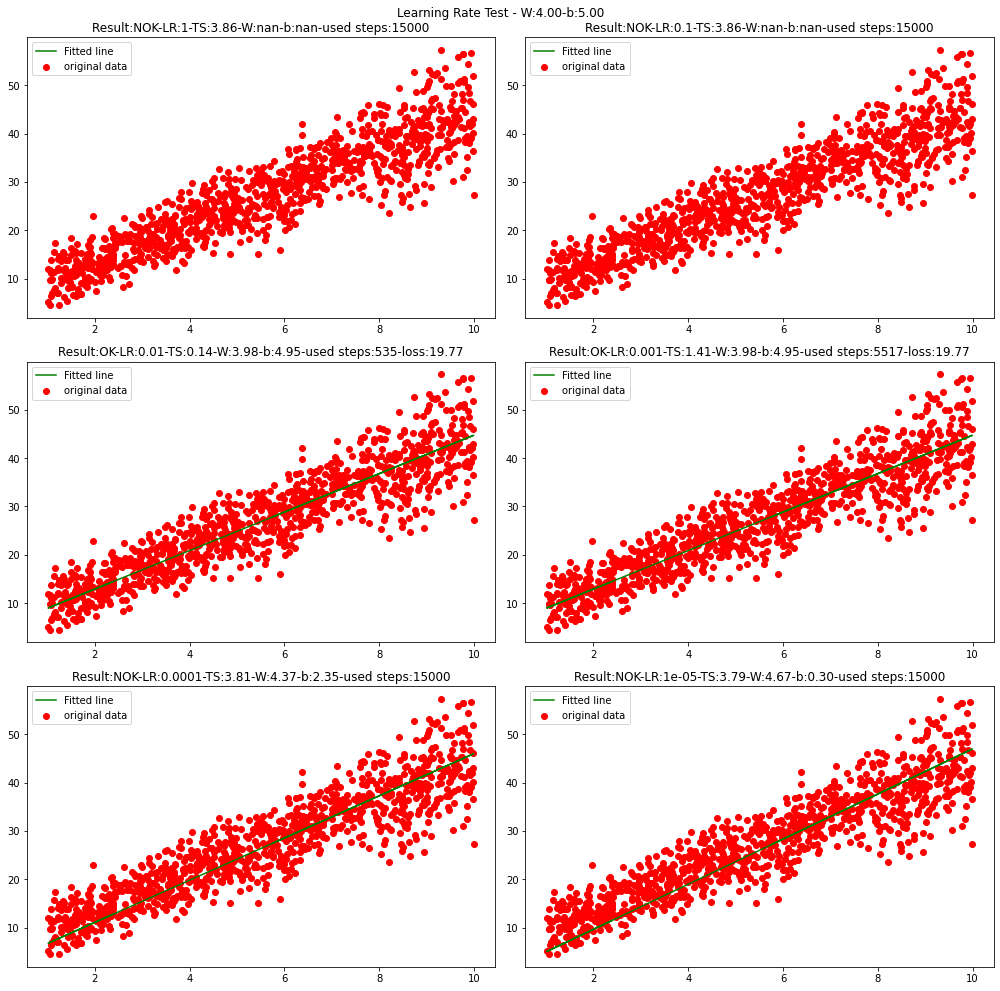

In [2]:

# V2 This program is going to use the same training data and test with different learning rate in pytorch
# It is still implementing the class defined.

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import sys
import time
%matplotlib inline

# This program is going to try to test with linear regression using pytorch. The object is to determine the optimum learning rate.

class PT_linear_regression:

    class linearRegression(nn.Module):
        def __init__(self,inputDimension,outputDimension):
            super().__init__()
            self.linear = nn.Linear(inputDimension,outputDimension)  # input and output is 1 dimension

        def forward(self, x):
            out = self.linear(x)
            return out

    def __init__(self,learning_Rate,inputDimension, outputDimension):

        self.model = self.linearRegression(inputDimension,outputDimension) 
        self.criterion = torch.nn.MSELoss() 
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=learning_Rate)
        
    def PT_optimization(self,inputs,labels):

        # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to      cummulate gradients
        self.optimizer.zero_grad()

        # get output from the model, given the inputs
        outputs = self.model.forward(inputs)

        # get loss for the predicted output
        loss = self.criterion(outputs, labels)

        # get gradients w.r.t to parameters
        loss.backward()

        # update parameters
        self.optimizer.step()

        w = self.model.linear.weight.data.numpy()[0][0]
        b = self.model.linear.bias.data.numpy()[0]

        return w,b

    # def PT_prediction(inputs):
    #     with torch.no_grad(): # we don't need gradients in the testing phase
    #         # predicted = model(input).data.numpy()
    #         predicted=self.model.forward(inputs)
    #     return predicted
     
    
def main(argv): # use main function to draw figure and compare 

    learning_rate = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001] #the learning rate we want to study
    Cols=2 # number of columes in the figure 
    testResult = "NOK" # identify if the test is OK or not 
    training_step = 15000 # specify training steps 
    used_step= 5000 # this is for figure plot 
    display_step = 500 # to control the display step number 
    Rows = len(learning_rate) // Cols # determine how many rows of subplots in the figure 
    Rows += len(learning_rate) % Cols # the extra row if it's not divided 
    w_loc=4 #local value of w
    w_scale=0.5 #scale of w
    b_loc=5 #local value of b
    b_scale=3 # scale of b
    x_low=1 #low range of x samples 
    x_high=10 #high range of x samples 
    w_init=1 #initial value of W
    b_init=1 # initial value of b 
    n_samples=1000 #number of samples 
    loss_value=0.0

    # generate random distribution of w and b using normal distribution 
    w_dis = np.random.normal(w_loc, w_scale, n_samples) #given a range, generate samples for w
    b_dis = np.random.normal(b_loc, b_scale, n_samples) #given a range, generate samples for b

    w_constant = np.mean(w_dis) # get mean of w
    b_constant = np.mean(b_dis) # get mean of b

    print('W mean value is {}, b mean value is {}'.format(w_constant, b_constant))

    # construct input X and output Y
    x = np.random.uniform(x_low, x_high, n_samples) #given a range, generate samples for x
    y = np.multiply(x, w_dis) + b_dis #based on X, W, b, we will have Y (output) as trained data 

    x=x.astype(np.float32)
    y=y.astype(np.float32)

    x=x.reshape(-1,1)
    y=y.reshape(-1,1)

    x_train=torch.from_numpy(x)
    y_train=torch.from_numpy(y)

    print('X shape is {}, Y shape is {}'.format(x.shape, y.shape))


    fig=plt.figure(figsize=(14,14))
    fig.suptitle('Learning Rate Test - W:'+ '%.2f'%w_loc+'-b:'+'%.2f'%b_loc)

    w=0 # value for weight
    b=0 # value for intercept

    # Converting inputs and labels to Variable
    if torch.cuda.is_available(): # this is trying with GPU
        inputs = Variable(x_train).cuda()
        labels = Variable(y_train).cuda()
    else:
        inputs = Variable(x_train)
        labels = Variable(y_train)   

    for i in range(len(learning_rate)):

        # Initialize a object based on defined class, with both input and output dimension as 1
        pt_lr= PT_linear_regression(learning_rate[i],1,1) 

        testResult = "NOK" # reset test result mark each iteration
        loss_value=0.0
        print("======== Start Testing ======> Running learning rate:", learning_rate[i])
        print("\n")

        start = time.time()
        for step in range(training_step):

            w,b = pt_lr.PT_optimization(inputs,labels)
            if step % display_step == 0:
                print("Still running, current step is:", step)

            if (abs(w - w_loc) < 0.05) & (abs(b-b_loc) < 0.05): #stop execution if w and b are within 5% range
                
                with torch.no_grad(): # we don't need gradients in the testing phase
                    pred=pt_lr.model.forward(inputs)
                loss = pt_lr.criterion(pred,labels)
                
                print("Running step======>", step)
                print("Step: %i, loss: %f, W: %F, b: %f" % (step, loss, w,b))
                testResult = "OK"
                loss_value=loss
                used_step=step
                print("Test is OK!")
                break

        if testResult == "NOK": #not converge within given training steps 
            print("The regression doesn't converge!")
            print("After %d steps, W is %.2f, b is %.2f" % (training_step, w, b))
            used_step=training_step
            
        end = time.time()
       
        spentTime=end-start
        print(f"Runtime of the program is {spentTime}\n\n")
        ax=fig.add_subplot(Rows, Cols, i + 1)

        if testResult=="OK":
            ax.set_title('Result:'+testResult+'-LR:'+str(learning_rate[i])+'-'+'TS:'+ '%.2f' % spentTime+'-W:%.2f'%w+'-b:%.2f'%b+'-used steps:'+str(used_step)+'-loss:%.2f'%loss_value)
        else:
            ax.set_title('Result:'+testResult+'-LR:'+str(learning_rate[i])+'-'+'TS:'+ '%.2f' % spentTime+'-W:%.2f'%w+'-b:%.2f'%b+'-used steps:'+str(used_step))

        ax.scatter(x,y, c='r', label="original data")
        ax.plot(x, np.array(w * x + b), c='g', label='Fitted line')
        ax.legend()

        
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main(sys.argv[1:])
